In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

LEAP FROG ALGORITHM

Leapfrog integration is a method to numerically integrate differential equations of the form
$\dot {v}=dv/dt=A(x)\\
\dot {x}=dx/dt=v $
In leapfrog integration, the equations for updating position and velocity are
\begin{aligned}a_{i}&=A(x_{i}),\\v_{i+1/2}&=v_{i-1/2}+a_{i}\,\Delta t,\\x_{i+1}&=x_{i}+v_{i+1/2}\,\Delta t,\end{aligned}
where
$x_{i}$ is position at step i .$v_{i+1/2\,}$ is the velocity, or first derivative of x
at step i+1/2,$a_{i}=A(x_{i})$ is the acceleration, or second derivative of x at step i, and $\Delta t$ is the size of each time step.

SIMPLE PENDULUM

After non-dimensionalisation,the coupled equations are:
\begin{eqnarray}
\frac{d\theta}{d\tau} &=& v \\
\frac{dv}{d\tau} &=& -4 \pi^2 \sin\theta 
\end{eqnarray}
Here, $ f(\theta, v, \tau) = v $ and $g(\theta, v, \tau) = -4 \pi^2 \sin\theta $

the equation for energy of the pendulum is

\begin{eqnarray}
E=\frac{1}{2}V^2+4\pi^2(1-\cos\theta) 
\end{eqnarray}

In [18]:
def f(v):
    return v
def g(theta):
    return (-4*m.pi**2*m.sin(theta))

In [19]:
def leapf(theta0,v0,dt,tf,Timeperiod):
    N=int(tf/dt)
    theta=theta0
    tau=0
    v=v0
    thetas=[]
    vs=[]
    taus=[]
    Elist=[]
    v+=0.5*dt*g(theta)
    for i in range(N):
        theta+=dt*f(v)
        v+=dt*g(theta)
        E=0.5*v**2+4*m.pi**2*(1-m.cos(theta))
        tau+=dt
        taus.append(tau)
        if theta>m.pi:
            theta-=2*m.pi
        elif theta<m.pi:
            theta+=2*m.pi
        vs.append(v)
        thetas.append(theta)
        Elist.append(E)
        if tau>0.5 and abs(theta-theta0)<=dt/2:
            T=tau
            break
            
    if Timeperiod==False:
        return theta,vs,Elist,taus
    elif Timeperiod==True:
        return print("the time period is",T)
    if Timeperiod==2:
                     return T
                     

CALCULATING THE TIMEPERIOD

In [20]:
leapf(0.1,0,0.001,10,True)

the time period is 0.9860000000000008


PLOTTING THETA VS TIME PERIOD GRAPH

In [21]:
thetas=np.linspace(0.1,3,985)
Tlist=[]
for i in thetas:
    T=leapf(i,0,0.001,10,2)
    Tlist.append(T)

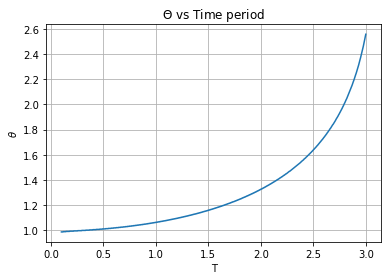

In [23]:
plt.plot(thetas,Tlist)
plt.title('$\Theta$ vs Time period')
plt.xlabel('T')
plt.ylabel(r'$\theta$')
plt.grid(True)

PLOTTING ENERGY VS TIME GRAPH

In [24]:
thetas,vs,Elist,taus=leapf(0.1,0,0.001,10,False)


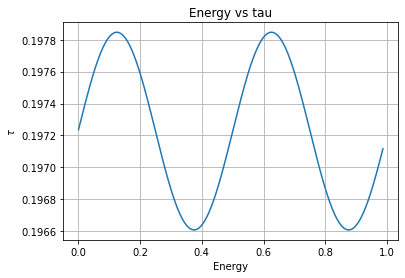

In [25]:
plt.plot(taus,Elist)
plt.title('Energy vs tau')
plt.xlabel('Energy')
plt.ylabel(r'$\tau$')
plt.grid(True)